In [1]:
# Harbinger Package
# version 1.1.707

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/jupyter.R")

#loading Harbinger
load_library("daltoolbox") 
load_library("harbinger") 

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: harbinger



In [2]:
#loading the example database
load(url("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/data/examples_motifs.RData"))

In [3]:
#Using the simple time series
dataset <- examples_motifs$mitdb102
head(dataset)

,serie,event,symbol
,<dbl>,<lgl>,<chr>
102992,-0.215,FALSE,N
102993,-0.210,FALSE,N
102994,-0.215,FALSE,N
102995,-0.230,FALSE,N
102996,-0.220,FALSE,N
102997,-0.200,FALSE,N


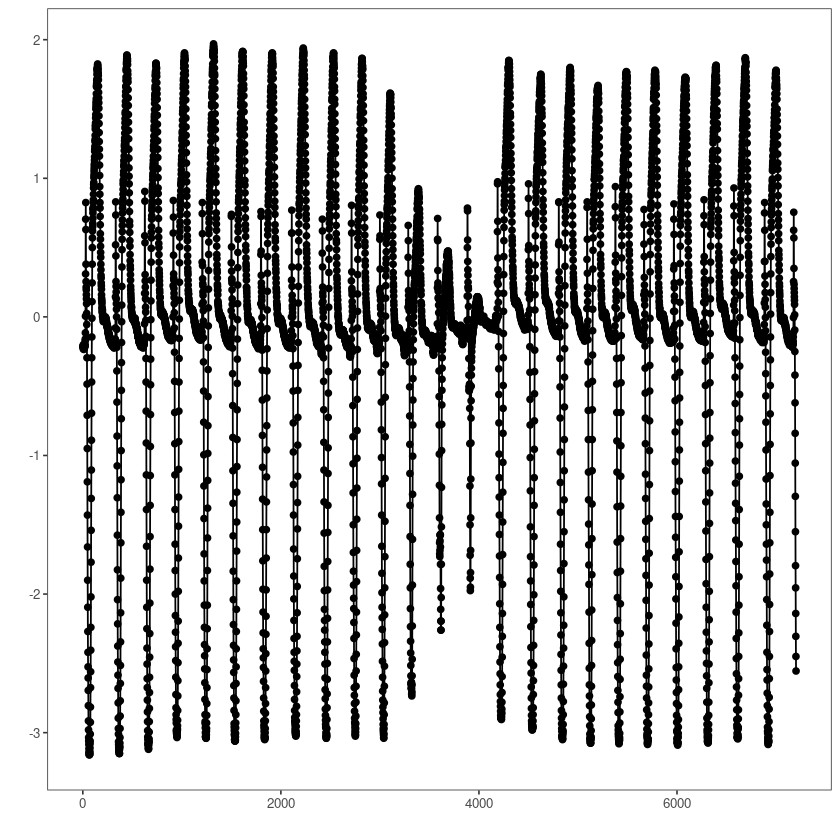

In [4]:
#ploting the time series
plot_ts(x = 1:length(dataset$serie), y = dataset$serie)

In [5]:
# establishing the method  
  model <- hdis_sax(26, 25)

In [6]:
# fitting the model
  model <- fit(model, dataset$serie)

In [7]:
# making detections
  detection <- detect(model, dataset$serie)

In [8]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

     idx event  type                       seq seqlen
1     16  TRUE motif EEEFEEEEGGJOSUUUTSSSRRQPM     25
2    234  TRUE motif ONNNMNMMMLLLLLLLKLKKKJJJJ     25
3    260  TRUE motif JIIIJIIHHHHIHGGGGGGGFFGGF     25
4    287  TRUE motif FFGFFEFFFFEFEFFFFEEEEEEEE     25
5    322  TRUE motif EEFFFFGKRTUUTSSRRQQOKEDDD     25
6    486  TRUE motif RRRQQQQPPOOOPOOONOOOONNOO     25
7    536  TRUE motif MLLLMKLKLKKKKJJJKJJJHIIIH     25
8    563  TRUE motif HHHHFGGGGFFFFFGFFFFFFFEEE     25
9    612  TRUE motif FFFEEFFGFGHMRTVUTSSSRRQPN     25
10   801  TRUE motif OOPPPPOPPPPOOOOPOOOOOOOON     25
11   827  TRUE motif NONNMMMNMMLLLMLLKKLKKJKJJ     25
12   857  TRUE motif JJJIHIIJIIHHHIIHHHHHIHGGG     25
13   903  TRUE motif GGHIIIHKOSTVUTSSSSRRQPKED     25
14  1066  TRUE motif RRRRRRQRQQQQQQQQQPPQQQPPP     25
15  1096  TRUE motif PPPQPPPQQQPPPPPPPOOPPPOOO     25
16  1122  TRUE motif OOONMNNNNLLMMMLLKLLLKJJKK     25
17  1157  TRUE motif JJIIHIIIIIHHIIIHHHIIIHGHH     25
18  1190  TRUE motif HHGHHHH

In [9]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      0     121  
FALSE     3     7078 


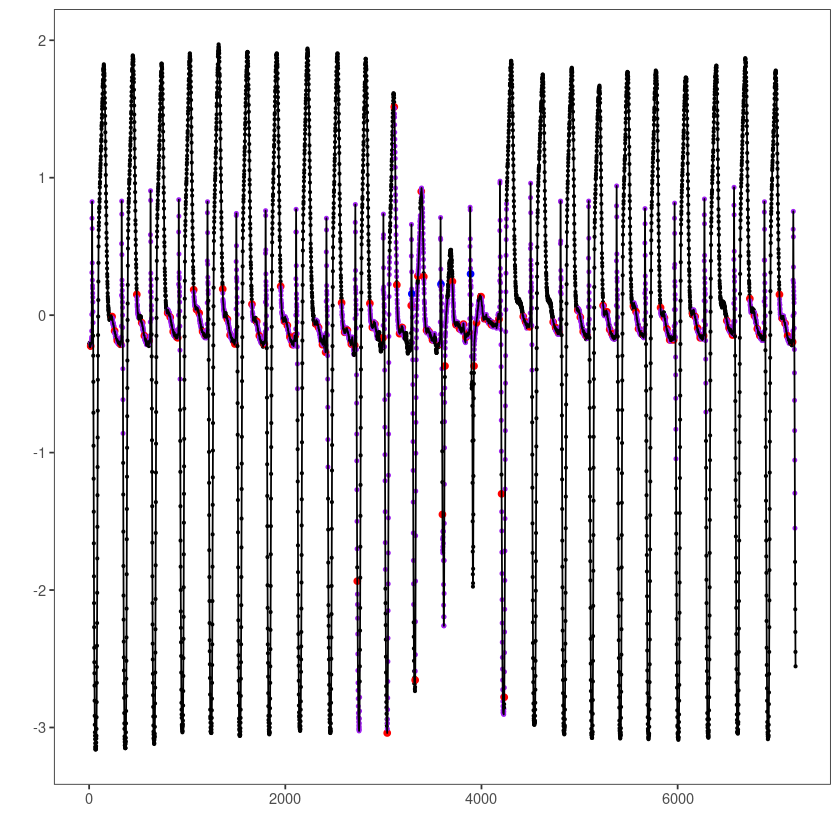

In [10]:
# ploting the results
  grf <- har_plot(model, dataset$serie, detection, dataset$event)
  plot(grf)